In [1]:
import requests
import pandas as pd
from datetime import datetime
import numpy as np
import APIs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline
%config InlineBackend.figure_format='retina'
fred_key = APIs.fred_api

# Set up

In [2]:
base = 'https://api.stlouisfed.org/fred/series/observations?series_id='

s_dict = {
    'MSPUS' : ['Median Sales Price', 'Houses Sold', 'United States'],
    'USSTHPI' : ['All-Transactions', 'House Price Index', 'United States', '1980Q1 = 100'],
    'MDSP' : ['Mortgage Debt Service Payments as a Percent of Disposable Personal Income', 'Mortgage'],
    'HHMSDODNS' : ['Liability, Level', 'Mortgage', 'Households and Nonprofit Organizations'],
    'CCDIHBQ156N' : ['CredAbility Consumer Distress Index', 'Household', 'Household Budget (DISCONTINUED)'],
}

start_date = '1980-01-01'
end_date = '2010-12-01'
dates = '&observation_start={}&observation_end={}'.format(start_date, end_date)
api_key = '&api_key={}'.format(fred_key)
ftype = '&file_type=json'

# Make requests (quarterly)

In [3]:
df = pd.DataFrame()
for code, name in s_dict.items():
    url = '{}{}{}{}{}'.format(base, code, dates, api_key, ftype)
    r = requests.get(url).json()['observations']
    df[name[0]] = [i['value'] for i in r]
    
df = df.replace('.', np.nan)    
df = df.astype(float)

sectors = pd.MultiIndex.from_tuples(list(zip([i[1] for i in s_dict.values()],[i[0] for i in s_dict.values()])))
df.columns = sectors

dates = pd.date_range(start_date, periods=df.shape[0], freq='Q')
df.index = dates

In [4]:
df.tail()

Houses Sold House Price Index  \
           Median Sales Price  All-Transactions   
2009-12-31           219000.0            327.90   
2010-03-31           222900.0            323.98   
2010-06-30           219500.0            321.09   
2010-09-30           224100.0            324.13   
2010-12-31           224300.0            321.77   

                                                                            Mortgage  \
           Mortgage Debt Service Payments as a Percent of Disposable Personal Income   
2009-12-31                                           6.547866                          
2010-03-31                                           6.377618                          
2010-06-30                                           6.211361                          
2010-09-30                                           6.110076                          
2010-12-31                                           5.954936                          

                                                      Household  
           Liability, Level CredAbility Consumer Distress Index  
2009-12-31        10442.797                           75.519908  
2010-03-31        10317.208                           76.542768  
2010-06-30        10256.119                           80.020487  
2010-09-30        10178.512                           77.207631  
2010-12-31         9993.502                           75.134737

In [5]:
df.describe()

Houses Sold House Price Index  \
      Median Sales Price  All-Transactions   
count         124.000000        124.000000   
mean       146882.258065        213.325484   
std         56058.481439         85.242848   
min         63700.000000        100.000000   
25%        109000.000000        146.137500   
50%        132950.000000        187.280000   
75%        190525.000000        278.925000   
max        257400.000000        378.210000   

                                                                       Mortgage  \
      Mortgage Debt Service Payments as a Percent of Disposable Personal Income   
count                                         124.000000                          
mean                                            5.760512                          
std                                             0.615873                          
min                                             4.375714                          
25%                                             5.527506                          
50%                                             5.729818                          
75%                                             6.003007                          
max                                             7.206655                          

                                                 Household  
      Liability, Level CredAbility Consumer Distress Index  
count       124.000000                          124.000000  
mean       4386.445806                           81.043955  
std        3203.693366                            9.545984  
min         860.063000                           58.875862  
25%        1822.477250                           74.870999  
50%        3265.226000                           84.486452  
75%        6267.143000                           87.471240  
max       10695.813000                           92.830802

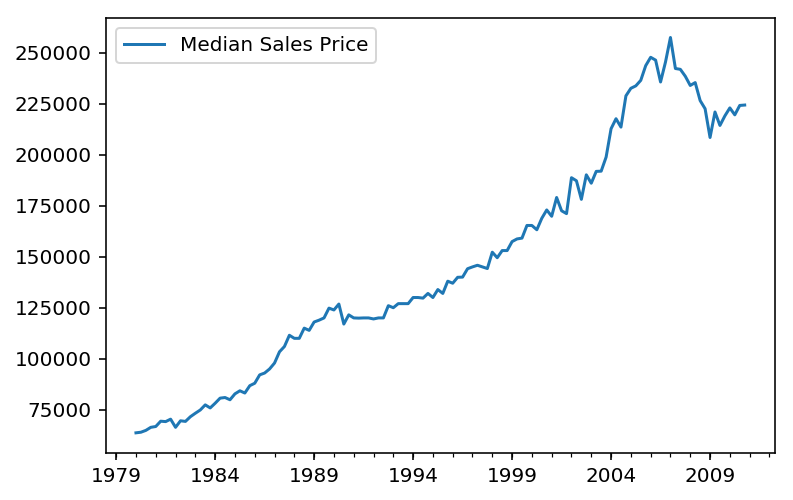

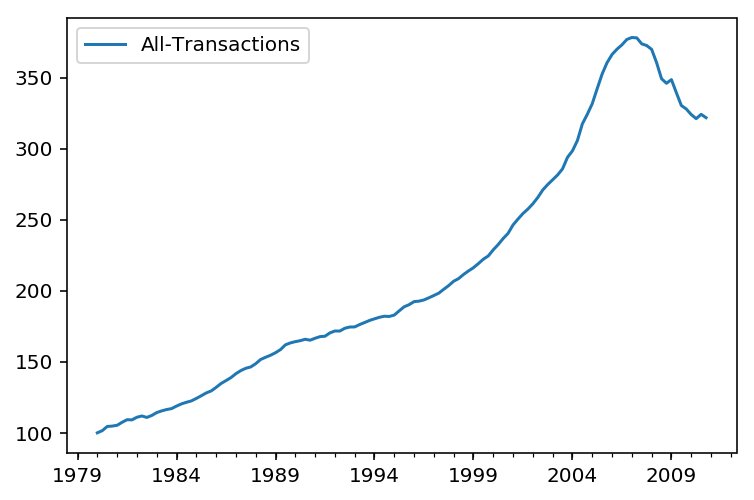

In [6]:
df['Houses Sold'].plot()
plt.legend()
plt.show()

df['House Price Index'].plot()
plt.legend()
plt.show()

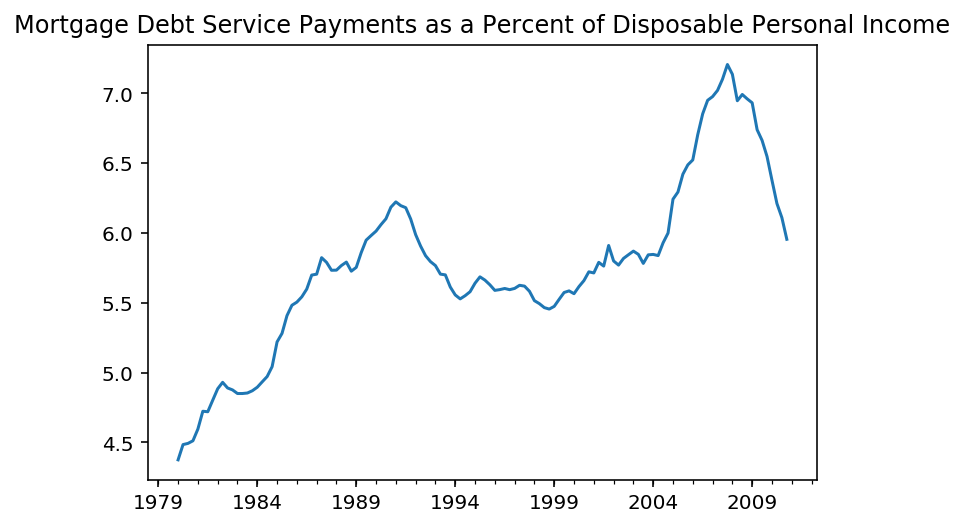

In [9]:
df['Mortgage']['Mortgage Debt Service Payments as a Percent of Disposable Personal Income'].plot()
plt.title('Mortgage Debt Service Payments as a Percent of Disposable Personal Income')
plt.show()

TypeError: __init__() keywords must be strings